In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import imageio

from pyrsgis import raster
from pyrsgis.convert import changeDimension

import matplotlib.pylab as pylab
params = {'figure.figsize': (20, 5),
          'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

%load_ext autoreload
%autoreload 2

import dataImageUtils as diu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


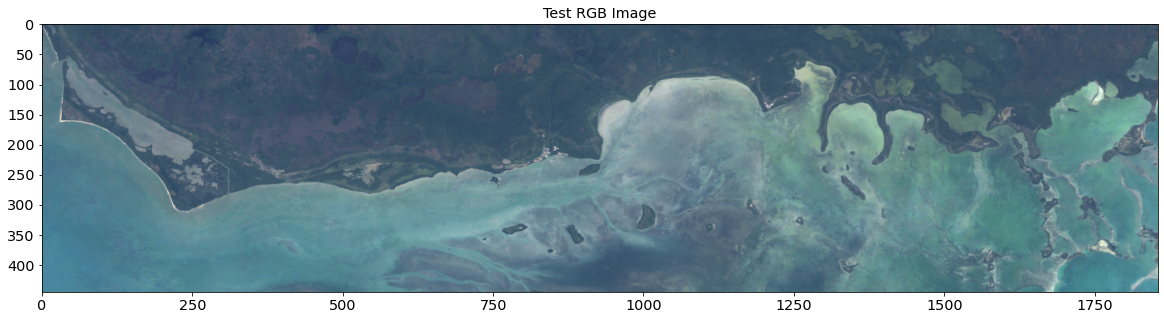

In [21]:
rgb_file = "../SatelliteImages/Florida_1_2000_simple_composite.tif"

rgb_multiple = 4

ds, blue = raster.read(rgb_file, bands=1)
ds, green = raster.read(rgb_file, bands=2)
ds, red = raster.read(rgb_file, bands=3)

blue = diu.removeOuterEdges(blue)
green = diu.removeOuterEdges(green)
red = diu.removeOuterEdges(red)

rgb_image = np.dstack((red * rgb_multiple, green * rgb_multiple, blue * rgb_multiple))

plt.figure()
# plt.imshow(rgb, vmin=0.1, vmax=0.2)
plt.imshow(rgb_image)
# plt.imshow(blue)
# plt.colorbar()
plt.title("Test RGB Image")
plt.savefig('SavedPlots/test_rgb.png', bbox_inches='tight')
plt.show()

In [22]:
path = 'SavedPlots/BasicNN/'
name = 'Florida_1'
year = ''

NDVI_path = f'{path}{name}/NDVI_{name}_2000.png'
labeled_path = f'{path}{name}/LabeledMangroves_{name}_2000.png'
predicted_path = f'{path}{name}/PredictedMangroves_{name}_2020.png'
difference_path = f'{path}{name}/GaL_{name}_2020.png'

image_list = [NDVI_path, labeled_path, predicted_path, difference_path]
# for i in image_list:
#     print(i)

with imageio.get_writer("SavedPlots/testgif.gif", mode='I', duration=2) as writer:
    writer.append_data(imageio.imread("SavedPlots/test_rgb.png"))
    for i in image_list:
        writer.append_data(imageio.imread(i))